In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import seaborn as sns 
%matplotlib inline

In [49]:
df_all=pd.read_csv('all_stocks.csv')
df2017=pd.read_csv('all_stocks_2017.csv')

In [50]:
df2017['Date']=pd.to_datetime(df2017['Date'])

In [51]:
df2017.head()

,Date,Open,High,Low,Close,Volume,Name
0,2017-01-03,178.83,180.00,177.22,178.05,2510055,MMM
1,2017-01-04,178.03,178.90,177.61,178.32,1541985,MMM
2,2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM
3,2017-01-06,177.29,178.60,175.80,178.23,1625049,MMM
4,2017-01-09,178.37,178.38,177.20,177.27,1622625,MMM


In [52]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 7 columns):
Date      7781 non-null datetime64[ns]
Open      7757 non-null float64
High      7772 non-null float64
Low       7762 non-null float64
Close     7781 non-null float64
Volume    7781 non-null int64
Name      7781 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 425.6+ KB


# All stock in daily basis: Average Stock Close Price by Date

In [7]:
by_date=df2017.groupby(["Date"],as_index=False).agg({'Close':'mean','Volume':sum})


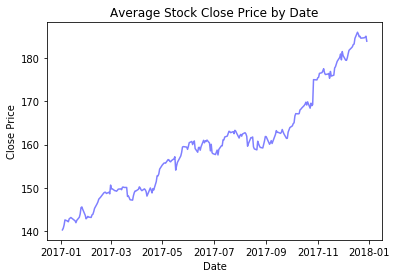

In [8]:
x=by_date['Date']
y=by_date['Close']
plt.plot(x, y,color="blue",alpha=0.5) # 'r' is the color red
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Average Stock Close Price by Date')
plt.show()

From 2017 til this January, the average stock price of the selected data set has been soaring dramatically. 

# 2017 Avg Price Histgram Chart

In [9]:
by_sticker= df2017.groupby(['Name'],as_index=False).agg({'Close':'mean'})

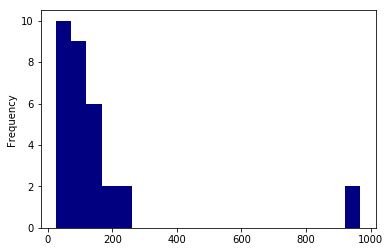

In [10]:
by_sticker['Close'].plot.hist(bins=20,color="navy")

Other than 2 company have high unit price around 900, the rest of the selected stocks are less than $250 in average close price

In [11]:
# Relationship between Stock Volume and Volatility

In [12]:
df_all.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


# IBM Stock Analysis

In [10]:
# From here, I will start to analyze and visualize on IBM stock

In [53]:
IBM=df2017[df2017['Name']=="IBM"]
AMZN=df2017[df2017['Name']=="AMZN"]
INTC=df2017[df2017['Name']=="INTC"]
GOOGL=df2017[df2017['Name']=="GOOGL"]

In [54]:
IBM.head()

,Date,Open,High,Low,Close,Volume,Name
3263,2017-01-03,167.00,167.87,166.01,167.19,2934299,IBM
3264,2017-01-04,167.77,169.87,167.36,169.26,3381432,IBM
3265,2017-01-05,169.25,169.39,167.26,168.70,2682301,IBM
3266,2017-01-06,168.69,169.92,167.52,169.53,2945536,IBM
3267,2017-01-09,169.47,169.80,167.62,167.65,3189891,IBM


In [15]:
#Check IBM Close Price Trend

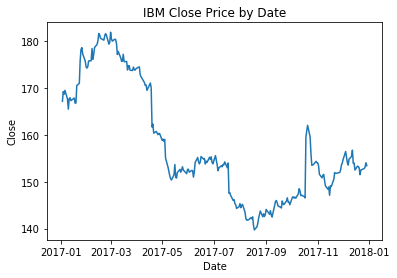

In [55]:
x=IBM['Date']
y=IBM['Close']
plt.plot(x, y) # 'r' is the color red
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('IBM Close Price by Date')
plt.show()

In [17]:
#Check IBM Volume

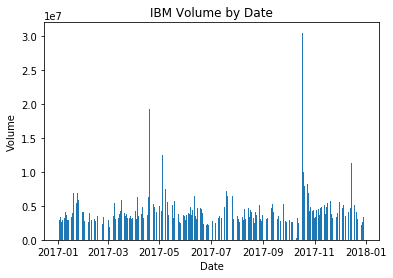

In [56]:
x=IBM['Date']
y=IBM['Volume']
plt.bar(x, y, align="center")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('IBM Volume by Date')
plt.show()

In [57]:
# IBM Moving Average Line in 5 days, 10 days, and 50 days

In [58]:
def moving_avg(df,ma_days):
    for ma in ma_days:
        column = "MA for %s days" %(str(ma))
        df[column] = pd.rolling_mean(df['Close'],ma)
        df.head()

In [59]:
ma_days=[5,10,20,50]
moving_avg(IBM,ma_days)

C:\Users\axd89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\axd89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\axd89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\axd89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.roll

In [60]:
moving_avg(GOOGL,ma_days)

C:\Users\axd89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\axd89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\axd89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\axd89\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.roll

In [61]:
IBM=IBM.set_index('Date')
IBM.head()

,Open,High,Low,Close,Volume,Name,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2017-01-03,167.00,167.87,166.01,167.19,2934299,IBM,NaN,NaN,NaN,NaN
2017-01-04,167.77,169.87,167.36,169.26,3381432,IBM,NaN,NaN,NaN,NaN
2017-01-05,169.25,169.39,167.26,168.70,2682301,IBM,NaN,NaN,NaN,NaN
2017-01-06,168.69,169.92,167.52,169.53,2945536,IBM,NaN,NaN,NaN,NaN
2017-01-09,169.47,169.80,167.62,167.65,3189891,IBM,168.466,NaN,NaN,NaN


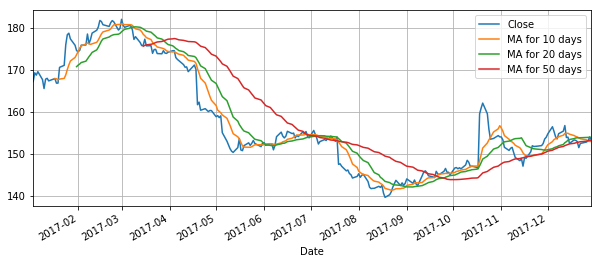

In [62]:
IBM[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(grid=True,figsize=(10,4))

In [124]:
#Check IBM Daily Return

In [63]:
IBM['Daily Return'] = IBM['Close'].pct_change()

In [64]:
IBM.head()

,Open,High,Low,Close,Volume,Name,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2017-01-03,167.00,167.87,166.01,167.19,2934299,IBM,NaN,NaN,NaN,NaN,NaN
2017-01-04,167.77,169.87,167.36,169.26,3381432,IBM,NaN,NaN,NaN,NaN,0.012381
2017-01-05,169.25,169.39,167.26,168.70,2682301,IBM,NaN,NaN,NaN,NaN,-0.003309
2017-01-06,168.69,169.92,167.52,169.53,2945536,IBM,NaN,NaN,NaN,NaN,0.004920
2017-01-09,169.47,169.80,167.62,167.65,3189891,IBM,168.466,NaN,NaN,NaN,-0.011089


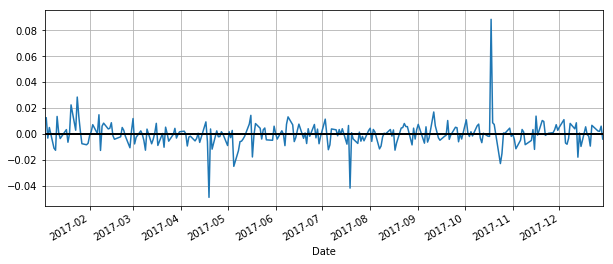

In [65]:
IBM['Daily Return'].plot(grid = True,figsize=(10,4)).axhline(y = 0, color = "black", lw = 2)


In [33]:
IBM['Daily Return'].mean()

-0.00029471787689286133

In [34]:
df2017['Daily Return']=df2017['Close'].pct_change()
df2017['Daily Return'].mean()

0.0029792947830716105

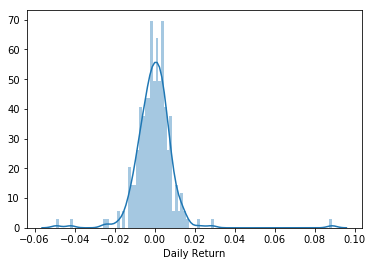

In [35]:
#Check what's the distribution of IBM daily Return
sns.distplot(IBM["Daily Return"].dropna(),bins=100)

IBM's average daily return from 2017 shows as negative, saying investor do not have confidence with IBM while the average daily return of the market (the total dataset) is positive. 

# Compare IBM with Some Competitors
IBM has continually shifted its business, including hardware, cloud servers, and software design. 
From here, I start to compare IBM stock price with 3 of it's competitors, Intel, Google, and Amazon. 

In [46]:
pick = ['IBM','INTC','GOOGL','AMZN','AAPL','CSCO','MSFT']
comp=df2017[['Date','Close','Name']][df2017['Name'].isin(pick)]

In [47]:
comp_p=comp.pivot(values='Close',index='Date',columns='Name')
comp.head()

,Date,Close,Name
502,2017-01-03,116.15,AAPL
503,2017-01-04,116.02,AAPL
504,2017-01-05,116.61,AAPL
505,2017-01-06,117.91,AAPL
506,2017-01-09,118.99,AAPL


In [48]:
comp_return=comp_p.pct_change()
comp_return.head()

Name,AAPL,AMZN,CSCO,GOOGL,IBM,INTC,MSFT
Date,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.004657,-0.014407,-0.000297,0.012381,-0.005191,-0.004474
2017-01-05,0.005085,0.030732,0.002326,0.006499,-0.003309,-0.001648,0.000000
2017-01-06,0.011148,0.019912,0.001989,0.014993,0.004920,0.003576,0.008668
2017-01-09,0.009160,0.001168,-0.001654,0.002387,-0.011089,0.003564,-0.003183


Unpivot comparison return table to compare return distribution in boxplot

In [75]:
#Unpivot: pandas melt function
comp_return2=pd.melt(comp_return,id_vars=['Date'],value_vars=pick,value_name='return%')

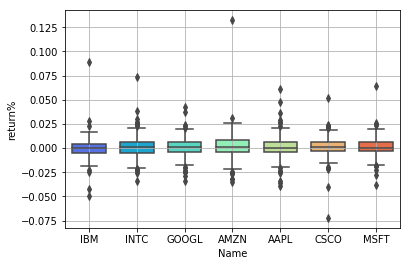

In [76]:
ax=sns.boxplot(x="Name", y="return%", data=comp_return2,palette='rainbow',width=0.7)
ax.grid(True)

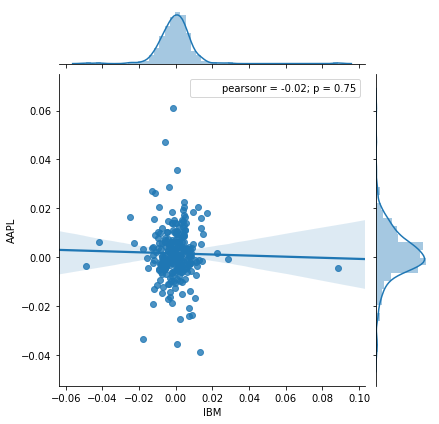

In [39]:
sns.jointplot(x='IBM',y='AAPL',data=comp_return,kind='reg')

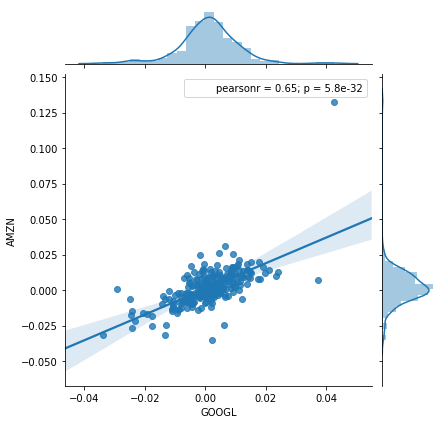

In [40]:
sns.jointplot(x='GOOGL',y='AMZN',data=comp_return,kind='reg')

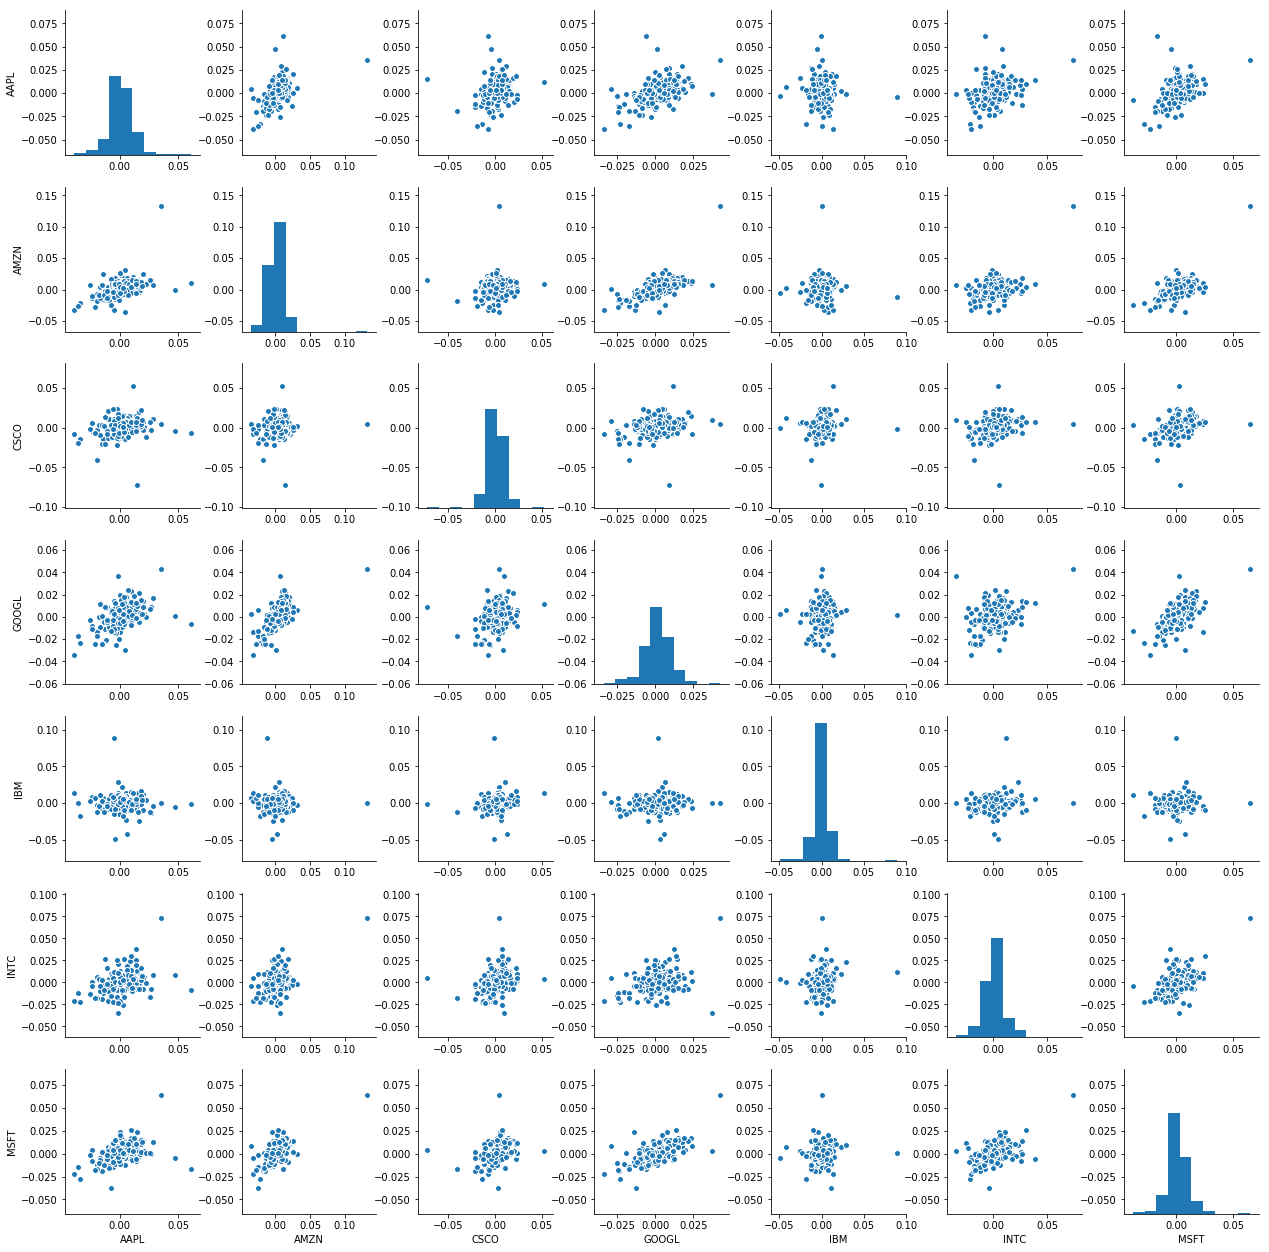

In [41]:
sns.pairplot(comp_return.dropna())

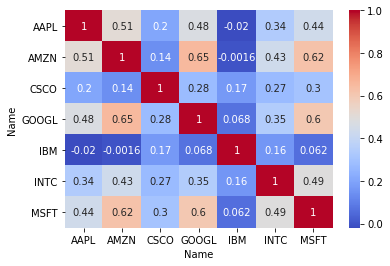

In [42]:
sns.heatmap(comp_return.corr(),cmap='coolwarm',annot=True)

In these pair correlation analysis, interestingly, IBM stock daily return does not strongly correlate to any Big Dot Com companies, like Google or Amazon. It's not correlate to hardware companies like Cisco or Intel. This analysis emphasis IBM should not be considered as either new software company or typical semiconduct company. In short, IBM's core business has various components, and it's hard to predict it's price by pair trading against other company or follow industrial trend. 

# IBM Candlestick Chart

In [6]:
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc

C:\Users\axd89\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [45]:
IBM= df2017[df2017['Name']=='IBM']
IBM=IBM.set_index('Date')

In [46]:
# define starting period
IBM = IBM[IBM.index > '2017-10-31']
IBM.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-11-01,154.10,154.90,153.83,154.03,3240246,IBM
2017-11-02,154.18,154.49,152.91,153.35,3397628,IBM
2017-11-03,153.42,153.47,151.49,151.58,4431825,IBM
2017-11-06,151.77,151.82,150.28,150.84,4498871,IBM
2017-11-07,151.37,151.51,150.50,151.35,3701052,IBM


In [47]:
IBM['Date'] = IBM.index.map(mdates.date2num)
ohlc = IBM[['Date','Open','High','Low','Close']]
# compute the simple moving average
IBM['ema10'] = IBM['Close'].ewm(span=10, adjust=False).mean()
IBM['ema20'] = IBM['Close'].ewm(span=20, adjust=False).mean()

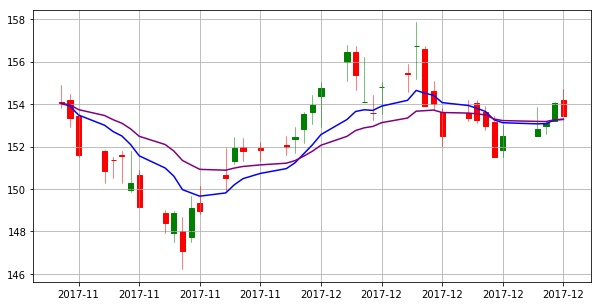

In [48]:
f1, ax = plt.subplots(figsize = (10,5))
# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plot the moving average lines
ax.plot(IBM.index, IBM['ema10'], color = 'blue', label = 'ma10')
ax.plot(IBM.index, IBM['ema20'], color = 'purple', label = 'ma20')
# other parameters
ax.grid(True)
plt.show()